# Discrete Uniform Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_discrete_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(xmin, xmax + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [3]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [4]:
def plot_discrete_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pmf = f.pmf(x_axis, **kwargs)
    fig, ax = plt.subplots(figsize = (8, 4))
    bars = ax.bar(x_axis, pmf, edgecolor = "k", linewidth = 2)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    print("-" * 10)
    if obs:
        plt.setp(bars[obs - x_axis.min()], color = "r", linewidth = 2)
        plt.setp(bars[obs - x_axis.min()], edgecolor = "k")
        obs_pmf = f.pmf(obs, **kwargs)
        print(f"PMF({obs}) = {obs_pmf}")
        
    plt.xticks(get_discrete_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_discrete_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_discrete_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

Ci sono $k$ *outcome*, tutti con la stessa probabilità di occorrenza.

**PMF**:

$$\large P(X=x_i)=\frac{1}{k}$$

**Expectation** e **Variance**:

$$\large E(X)=\frac{k+1}{2}$$

$$\large Var(X)=\frac{1}{12}(k^2-1)$$

---

#### Probability Mass Function

Mean: 5.5
Median: 5.0
Variance: 8.25
Standard Deviation: 2.8722813232690143
----------


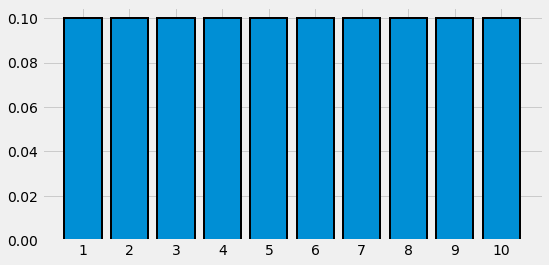

In [6]:
y_min = 1
y_max = 10

plot_discrete_distribution(f = stats.randint,
                           x_axis = np.arange(y_min, y_max + 1),
                           low = y_min,
                           high = y_max + 1)

---

#### RVS

Min: 1
Mean: 5.407
Median: 5.0
Max: 10
Variance: 7.935351
Standard Deviation: 2.816975505750804


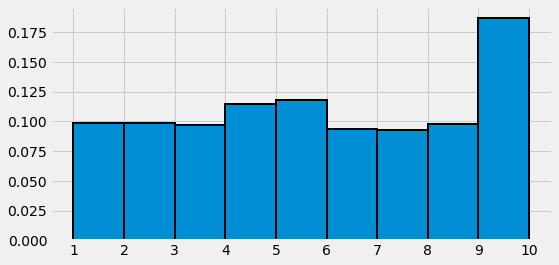

In [7]:
sample = sample_discrete_distribution(f = stats.randint,
                                      size = 1000,
                                      low = 1,
                                      high = 10 + 1)

---